<a href="https://colab.research.google.com/github/syaikhul-anam/Klasifikasi-Jenis-Penyakit-DaunPadi/blob/main/Klasifikasi_Jenis_Penyakit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os #menejemenisasi file dan folder
import cv2 
import numpy as np
from sklearn.utils import shuffle
from PIL import Image #library clean data
#library untuk menampilkan gambar
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#library tensorflow untuk pelatihan model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #library untuk augmentasi gambar
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as k
from keras.preprocessing import image

In [ ]:
#Direktori data
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/Skripsi/DATA-SKRIPSI/Model_2/datasets'
#Direktori data daun sakit
blast_dir = os.path.join(base_dir, 'Blast')
#Direktori data daun sehat
brownspot_dir = os.path.join(base_dir, 'Brown_Spot')
#Direktori data daun sehat
hispa_dir = os.path.join(base_dir, 'Hispa')
#Mengambil semua anama file dalam masing-masing direktori
balst_fnames = os.listdir(blast_dir )
brownspot_fnames = os.listdir(brownspot_dir)
hispa_fnames = os.listdir(hispa_dir)

In [ ]:
#check file
print('total data diseased:',len(os.listdir(blast_dir)))
print('total data healthy:',len(os.listdir(brownspot_dir)))
print('total data healthy:',len(os.listdir(hispa_dir)))

total data diseased: 300
total data healthy: 300
total data healthy: 300


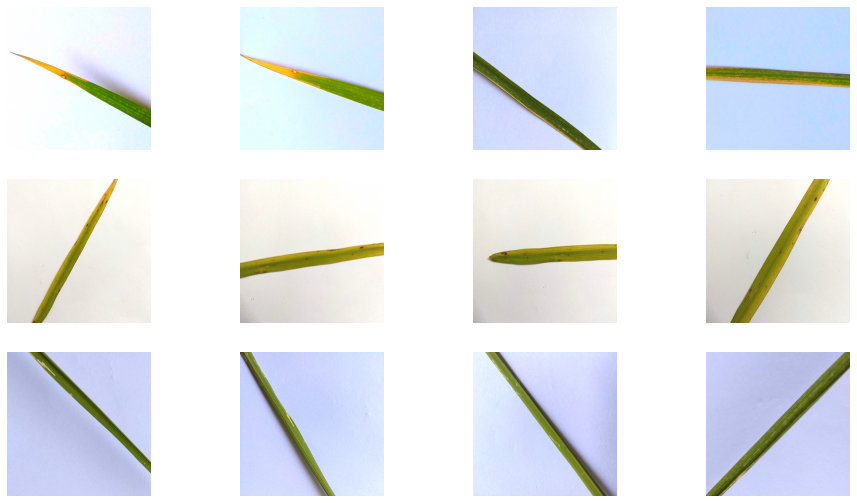

In [ ]:
cols = 4
rows = 3

pic_index = 0
#menampilkan gambar file
img = plt.gcf()
img.set_size_inches(cols*4, rows*3) 

pic_index+=4

#menyimpan ke dalam list nama file yang akan ditampilkan
show_blast_img = [os.path.join(blast_dir, fname)
                      for fname in balst_fnames[pic_index-4:pic_index] 
                    ]

show_brownspot_img = [os.path.join(brownspot_dir, fname)
                      for fname in brownspot_fnames[pic_index-4:pic_index]
                    ]
show_hispa_img = [os.path.join(hispa_dir, fname)
                      for fname in hispa_fnames[pic_index-4:pic_index]
                    ]
for i, img_path in enumerate(show_blast_img+show_brownspot_img+show_hispa_img):
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('off')

  image = mpimg.imread(img_path)
  plt.imshow(image)

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    shuffle=True,
    batch_size = 32,
    subset='training',
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size = 32,
    subset='validation',
    class_mode = 'categorical'
)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'Blast': 0, 'Brown_Spot': 1, 'Hispa': 2}


In [ ]:
#create model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

#menampilkan summary/keterangan dari model
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Skripsi/DATA-SKRIPSI/Model_2/HasilModel/Model_Checkpoint-{epoch:02d}-{val_accuracy:.02f}.h5'
#Menyimpan model dengan kriteria tertentu
checkpoint = ModelCheckpoint(file_path,
                             monitor='val_loss',                            
                             save_best_only = True,
                             mode = 'min'
                            )

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator), 
    epochs = 50,
    callbacks=[checkpoint],
    validation_data = validation_generator,
    validation_steps =  len(validation_generator), 
    verbose = 2
)

Epoch 1/50
23/23 - 626s - loss: 2.2256 - accuracy: 0.3597 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/50
23/23 - 185s - loss: 1.1667 - accuracy: 0.4000 - val_loss: 1.0459 - val_accuracy: 0.4000
Epoch 3/50
23/23 - 185s - loss: 1.2055 - accuracy: 0.4764 - val_loss: 1.2029 - val_accuracy: 0.3667
Epoch 4/50
23/23 - 181s - loss: 0.9799 - accuracy: 0.5375 - val_loss: 0.8987 - val_accuracy: 0.5444
Epoch 5/50
23/23 - 181s - loss: 0.9317 - accuracy: 0.5667 - val_loss: 1.3050 - val_accuracy: 0.4667
Epoch 6/50
23/23 - 184s - loss: 0.8601 - accuracy: 0.5819 - val_loss: 0.8543 - val_accuracy: 0.6500
Epoch 7/50
23/23 - 180s - loss: 0.8064 - accuracy: 0.6639 - val_loss: 1.0361 - val_accuracy: 0.4833
Epoch 8/50
23/23 - 180s - loss: 0.9820 - accuracy: 0.6375 - val_loss: 0.9627 - val_accuracy: 0.4222
Epoch 9/50
23/23 - 181s - loss: 0.7232 - accuracy: 0.6681 - val_loss: 0.9183 - val_accuracy: 0.5389
Epoch 10/50
23/23 - 182s - loss: 0.8539 - accuracy: 0.6444 - val_loss: 0.8477 - val_accuracy: 0.6611

In [ ]:
score = model.evaluate(validation_generator, batch_size=10)
model.metrics_names
score

6/6 [==============================] - 28s 4s/step - loss: 0.7525 - accuracy: 0.7722


[0.7524803280830383, 0.7722222208976746]

In [ ]:
score = model.evaluate(train_generator, batch_size=10)
model.metrics_names
score

23/23 [==============================] - 110s 5s/step - loss: 0.1897 - accuracy: 0.9278


[0.1897437423467636, 0.9277777671813965]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


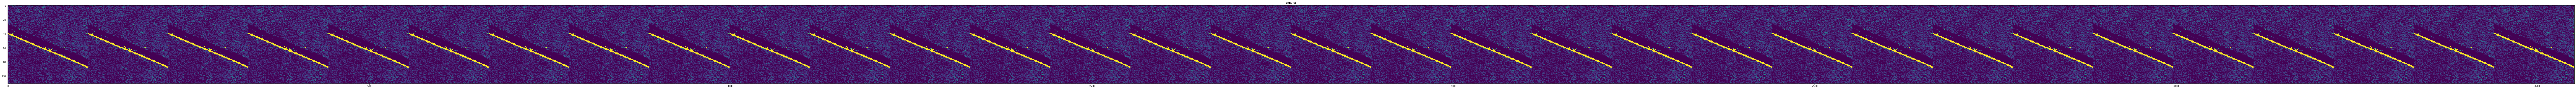

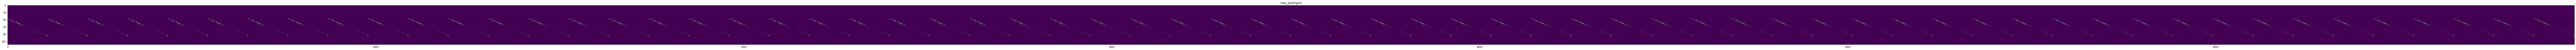

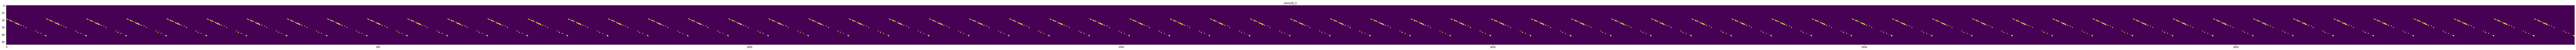

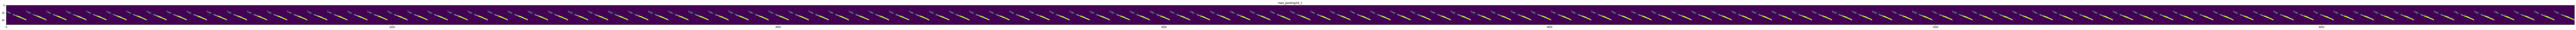

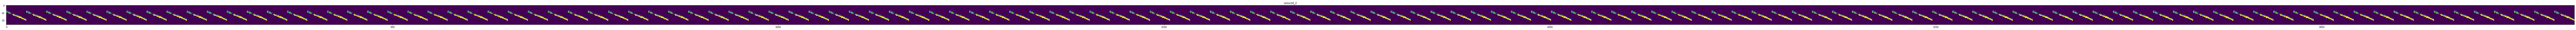

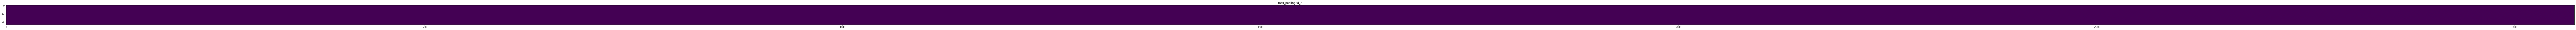

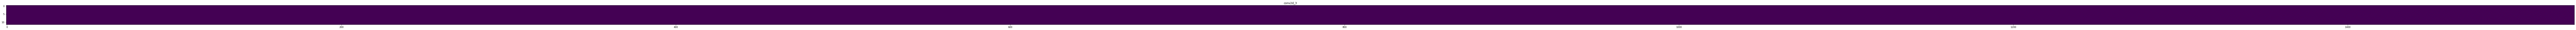

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

blast_img_files = [os.path.join(blast_dir, f) for f in balst_fnames]
brownspot_img_files = [os.path.join(brownspot_dir, f) for f in brownspot_fnames]
hispa_img_files = [os.path.join(hispa_dir, f) for f in hispa_fnames]

img_path = random.choice(blast_img_files + brownspot_img_files + hispa_img_files)
img = load_img(img_path, target_size=(224, 224))  
x = img_to_array(img)  
x = x.reshape((1,)+ x.shape)

x/=255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, 1]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 200. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

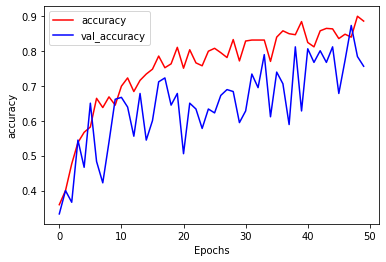

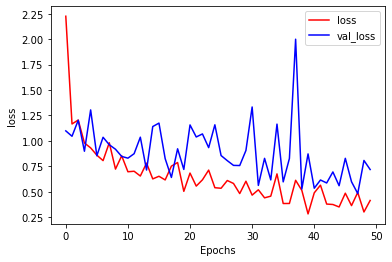

In [ ]:
def plot_graphs(history, string):
  epochs = range(len(history.history[string]))
  plt.plot(epochs, history.history[string],'r', label=string)
  plt.plot(epochs, history.history['val_'+string],'b',label=string+'_val')
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

Saving img_test (1).jpg to img_test (1).jpg
Saving img_test (2).jpg to img_test (2).jpg
Saving img_test (3).jpg to img_test (3).jpg
Saving img_test (4).jpg to img_test (4).jpg
Saving img_test (5).jpg to img_test (5).jpg
Saving img_test (6).jpg to img_test (6).jpg
Saving img_test (7).jpg to img_test (7).jpg
Saving img_test (8).jpg to img_test (8).jpg
Saving img_test (9).jpg to img_test (9).jpg
Saving img_test (10).jpg to img_test (10).jpg
Saving img_test (11).jpg to img_test (11).jpg
Saving img_test (12).jpg to img_test (12).jpg
Saving img_test (13).jpg to img_test (13).jpg
Saving img_test (14).jpg to img_test (14).jpg
Saving img_test (15).jpg to img_test (15).jpg
Saving img_test (16).jpg to img_test (16).jpg
Saving img_test (17).jpg to img_test (17).jpg
Saving img_test (18).jpg to img_test (18).jpg
Saving img_test (19).jpg to img_test (19).jpg
Saving img_test (20).jpg to img_test (20).jpg
Saving img_test (21).jpg to img_test (21).jpg
Saving img_test (22).jpg to img_test (22).jpg
Saving

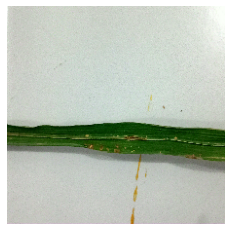

[[0. 0. 1.]]

Hasil prediksi: Hispa


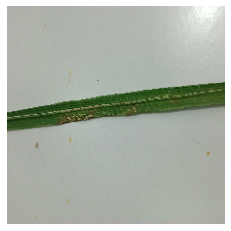

[[0.0000000e+00 4.4030244e-16 1.0000000e+00]]

Hasil prediksi: Hispa


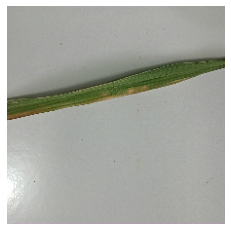

[[1.9204899e-07 9.9999976e-01 0.0000000e+00]]

Hasil prediksi: Unkown


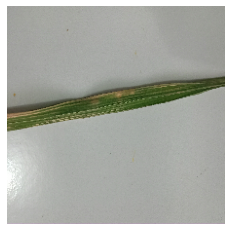

[[0. 0. 1.]]

Hasil prediksi: Hispa


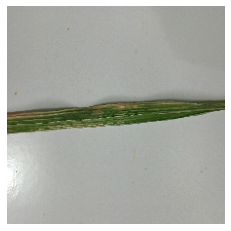

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


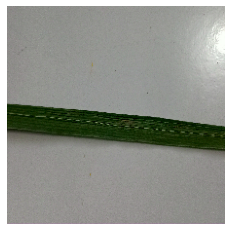

[[0. 0. 1.]]

Hasil prediksi: Hispa


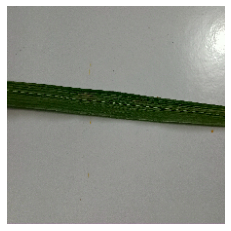

[[0. 0. 1.]]

Hasil prediksi: Hispa


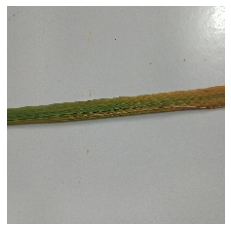

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


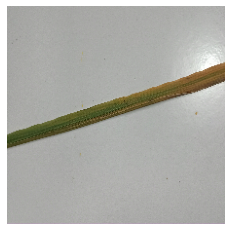

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


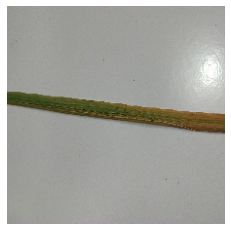

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


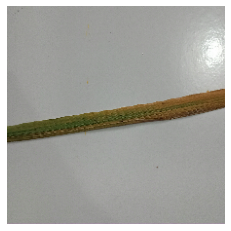

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


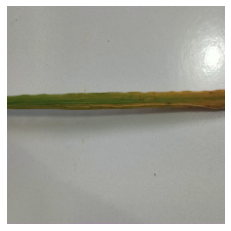

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


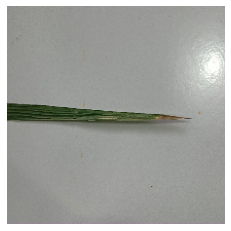

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


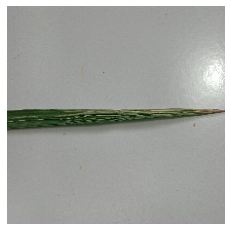

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


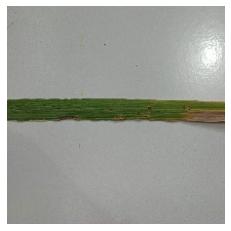

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


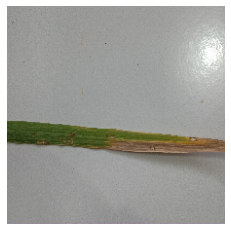

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


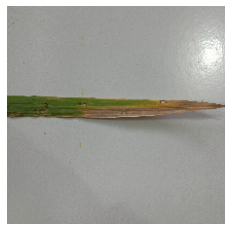

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


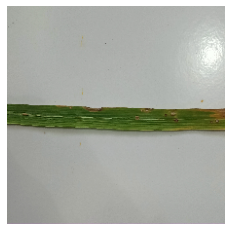

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


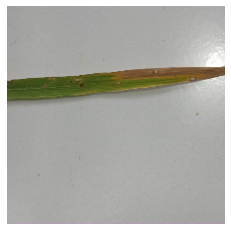

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


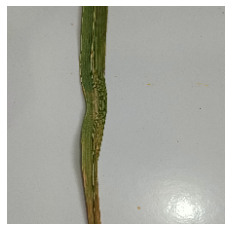

[[0. 0. 1.]]

Hasil prediksi: Hispa


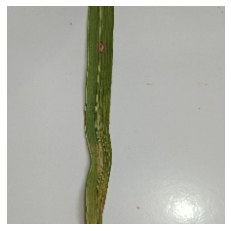

[[0. 0. 1.]]

Hasil prediksi: Hispa


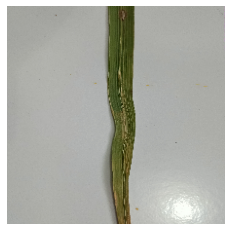

[[0. 0. 1.]]

Hasil prediksi: Hispa


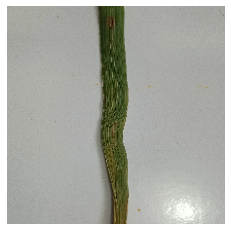

[[0. 0. 1.]]

Hasil prediksi: Hispa


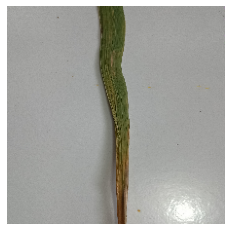

[[1.8268873e-11 1.0812663e-37 1.0000000e+00]]

Hasil prediksi: Hispa


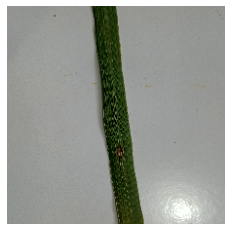

[[0. 0. 1.]]

Hasil prediksi: Hispa


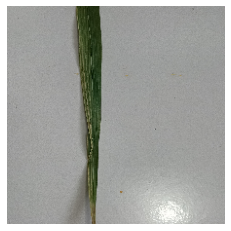

[[0. 0. 1.]]

Hasil prediksi: Hispa


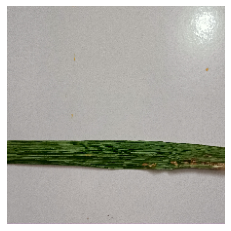

[[0. 0. 1.]]

Hasil prediksi: Hispa


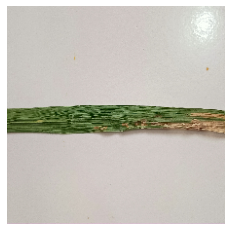

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


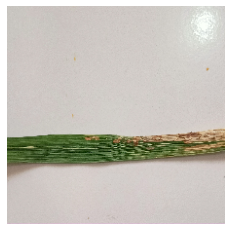

[[0.000000e+00 9.277972e-13 1.000000e+00]]

Hasil prediksi: Hispa


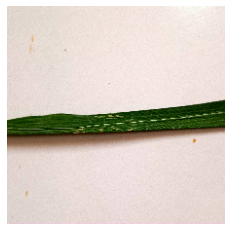

[[0. 0. 1.]]

Hasil prediksi: Hispa


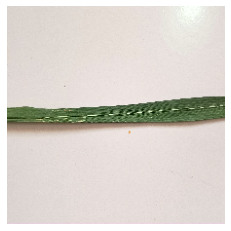

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


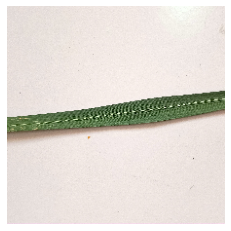

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


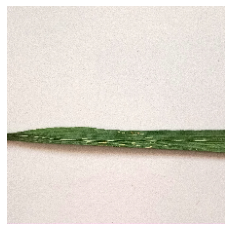

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


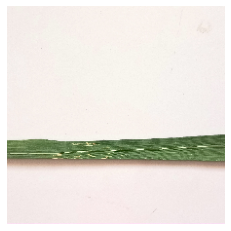

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


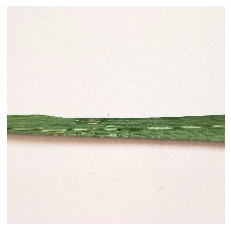

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


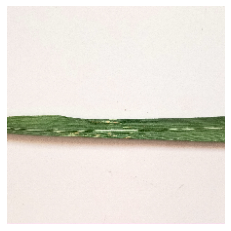

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


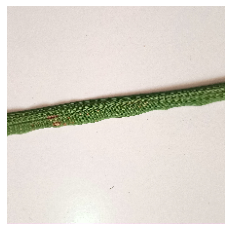

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


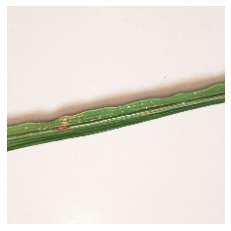

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


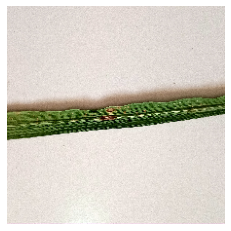

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


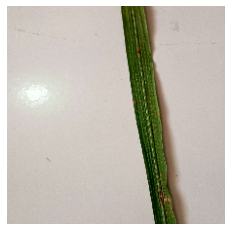

[[0. 0. 1.]]

Hasil prediksi: Hispa


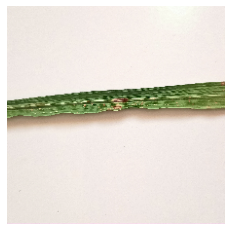

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


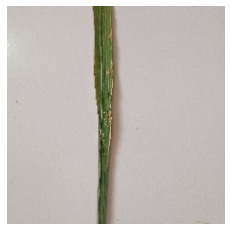

[[1.0000000e+00 1.7838378e-35 0.0000000e+00]]

Hasil prediksi: Blast


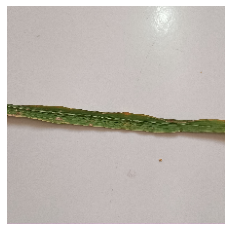

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


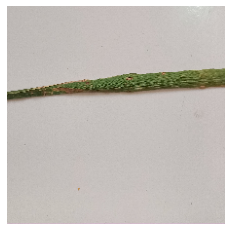

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


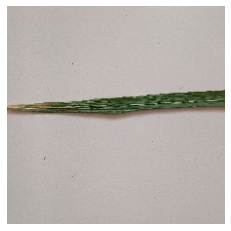

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


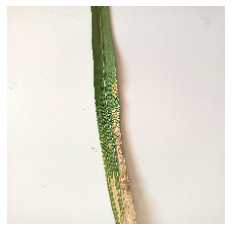

[[1. 0. 0.]]

Hasil prediksi: Blast


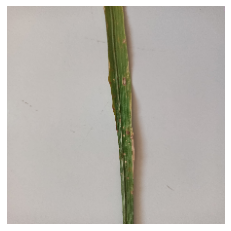

[[0. 0. 1.]]

Hasil prediksi: Hispa


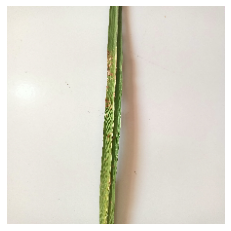

[[0. 0. 1.]]

Hasil prediksi: Hispa


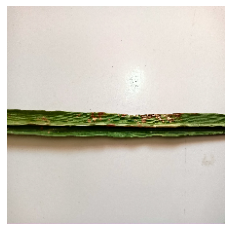

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


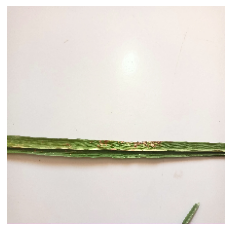

[[0. 1. 0.]]

Hasil prediksi: BrownSpot


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  
  print('\nHasil prediksi:',end=' ')
  if classes[0][0]==1:
    print('Blast')
  elif classes[0][1]==1:
    print('BrownSpot')
  elif classes[0][2]==1:
    print('Hispa')
  else:
    print('Unkown')